In [195]:
import pandas as pd
from cuml import UMAP, HDBSCAN, PCA
from cuml.metrics import pairwise_distances
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df_tags = pd.read_parquet("../../models/tags.parquet")
df_tags

tag,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
appid,,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1500,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1510,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289130,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3289230,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3293040,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


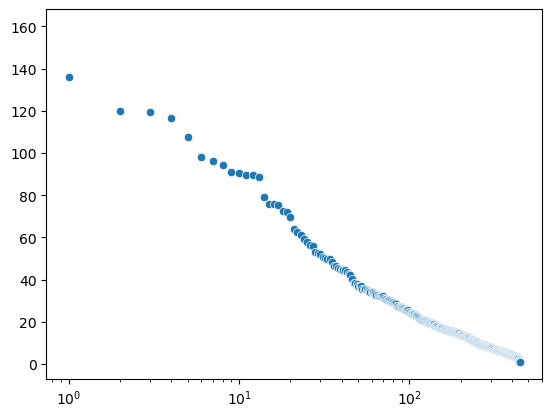

In [213]:
sns.scatterplot(abs(df_tags.std()/df_tags.mean()).sort_values(ascending=False, ignore_index=True))
plt.xscale('log')

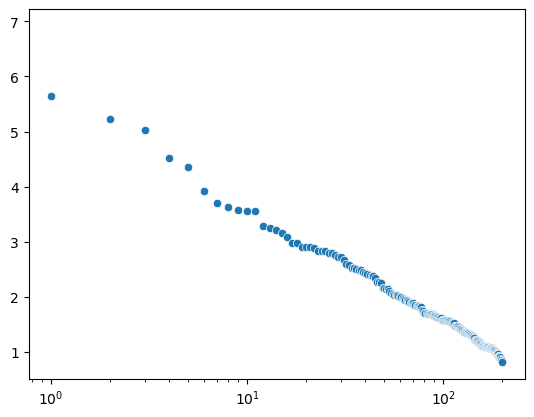

In [ ]:
df_tags_UMAP = UMAP(n_components=200, random_state=42).fit_transform(df_tags)
sns.scatterplot((df_tags_UMAP.std()/df_tags_UMAP.mean()).sort_values(ascending=False, ignore_index=True))
plt.xscale('log')

In [203]:
(df_tags_UMAP.corr()**2).mean().mean()

0.08768144012707793

In [204]:
(df_tags_PCA.corr()**2).mean().mean()

0.0050000000795937

In [205]:
(df_tags.corr()**2).mean().mean()

0.0032666952277892896

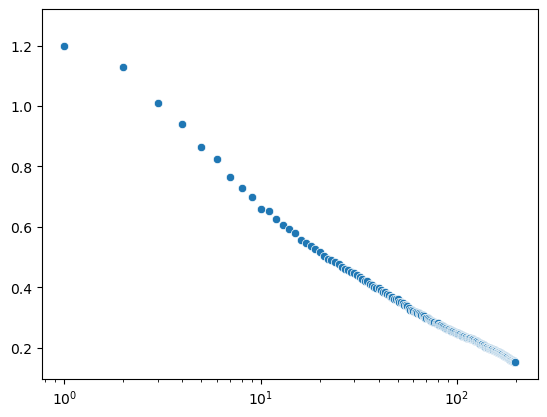

In [218]:
df_tags_PCA = PCA(n_components=200, random_state=42).fit_transform(df_tags)
sns.scatterplot(df_tags_PCA.std())
plt.xscale('log')

In [145]:
model_hdbscan = HDBSCAN()
df_tags_HDBSCAN = model_hdbscan.fit_predict(df_tags_PCA)
df_tags_HDBSCAN.loc[753640]

-1

In [124]:
model_hdbscan = HDBSCAN()
df_tags_HDBSCAN = model_hdbscan.fit_predict(df_tags_UMAP)
df_tags_HDBSCAN.loc[753640]

-1

In [172]:
distances = pairwise_distances(df_tags, df_tags.loc[753640].values.reshape(1,-1))
distances

0        8.544003
1        9.591663
2        8.124039
3        7.280110
4        7.211102
           ...   
51384    7.745967
51385    9.539392
51386    8.306623
51387    9.165152
51388    9.165152
Length: 51389, dtype: float32

In [171]:
distances = pairwise_distances(df_tags_PCA, df_tags_PCA.loc[753640].values.reshape(1,-1))
distances

0        5.708077
1        5.531467
2        4.952563
3        5.551412
4        5.840709
           ...   
51384    6.269310
51385    6.815525
51386    6.016899
51387    6.802065
51388    6.894972
Length: 51389, dtype: float32

In [173]:
dict_distances = {i:j for i, j in zip(df_tags_PCA.index, distances)}
df_distances = pd.DataFrame.from_dict(dict_distances, orient='index', columns=['distance'])
df_distances

,distance
1002,8.544003
1500,9.591663
1510,8.124039
2400,7.280110
2420,7.211102
...,...
3289130,7.745967
3289230,9.539392
3293040,8.306623
3301660,9.165152


In [174]:
df_distances.sort_values('distance')

,distance
753640,0.000000
251110,4.358899
890720,4.690416
306760,4.795832
802900,4.898980
...,...
1963360,11.135529
2226030,11.135529
340440,11.135529
347290,11.180340


In [175]:
df_tags.loc[622010][df_tags.loc[622010] > 0]

tag
Adventure                  2
Artificial Intelligence    1
Atmospheric                2
Exploration                2
Female Protagonist         2
First-Person               2
Mystery                    2
Psychological              1
Puzzle                     2
Robots                     1
Sci-fi                     2
Singleplayer               2
Space                      2
Story Rich                 2
Walking Simulator          2
Name: 622010, dtype: int64

In [153]:
df_tags.loc[753640][df_tags.loc[753640] > 0]

tag
3D                      1
Adventure               2
Atmospheric             2
Beautiful               1
Epic                    1
Exploration             2
First-Person            1
Great Soundtrack        2
Horror                  1
Mystery                 2
Open World              2
Psychological Horror    1
Puzzle                  2
Sci-fi                  1
Simulation              1
Singleplayer            2
Space                   2
Story Rich              2
Name: 753640, dtype: int64

In [177]:
df_comparison = df_tags.loc[[753640,622010,251110]].replace(0, np.nan).dropna(axis=1, how='all').replace(np.nan, 0).transpose().astype(int)
df_comparison.style.background_gradient(cmap='viridis')

appid,753640,622010,251110
tag,,,
3D,1,0,0
Adventure,2,2,2
Artificial Intelligence,0,1,0
Atmospheric,2,2,2
Beautiful,1,0,0
Epic,1,0,0
Exploration,2,2,2
Female Protagonist,0,2,0
First-Person,1,2,2


In [194]:
(df_comparison.transpose() - df_comparison.transpose().loc[753640]).drop(753640).transpose().style.background_gradient(cmap='RdBu_r', vmin=-2, vmax=2)

appid,622010,251110
tag,,
3D,-1,-1
Adventure,0,0
Artificial Intelligence,1,0
Atmospheric,0,0
Beautiful,-1,-1
Epic,-1,-1
Exploration,0,0
Female Protagonist,2,0
First-Person,1,1
